### Import libraries

In [248]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode

### Exploratory Data Analysis 

In [249]:
data = pd.read_excel('./dataset.xlsx')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [251]:
data.corr()

,card_present_flag,merchant_code,balance,age,amount
card_present_flag,1.000000,NaN,0.005925,-0.008405,-0.002074
merchant_code,NaN,NaN,NaN,NaN,NaN
balance,0.005925,NaN,1.000000,0.199329,0.059178
age,-0.008405,NaN,0.199329,1.000000,0.029980
amount,-0.002074,NaN,0.059178,0.029980,1.000000


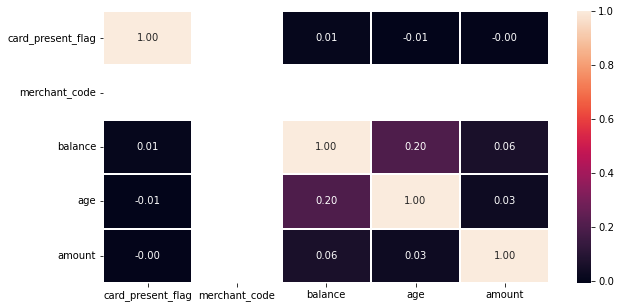

In [252]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,fmt='.2f',linewidths=2)
plt.show()

### Salary

In [253]:
data.drop(["status", "card_present_flag", "bpay_biller_code", "account", "currency", "long_lat", 
                    "merchant_id", "merchant_code", "merchant_suburb",
                   "extraction", "transaction_id", "merchant_long_lat"], axis = 1, inplace = True)

In [254]:
data

,txn_description,first_name,balance,date,gender,age,merchant_state,amount,country,customer_id,movement
0,POS,Diana,35.39,2018-08-01,F,26,QLD,16.25,Australia,CUS-2487424745,debit
1,SALES-POS,Diana,21.20,2018-08-01,F,26,NSW,14.19,Australia,CUS-2487424745,debit
2,POS,Michael,5.71,2018-08-01,M,38,NSW,6.42,Australia,CUS-2142601169,debit
3,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,QLD,40.90,Australia,CUS-1614226872,debit
4,SALES-POS,Diana,17.95,2018-08-01,F,26,QLD,3.25,Australia,CUS-2487424745,debit
...,...,...,...,...,...,...,...,...,...,...,...
12038,POS,Melissa,14054.14,2018-10-31,F,30,VIC,9.79,Australia,CUS-55310383,debit
12039,SALES-POS,Robert,9137.79,2018-10-31,M,20,NSW,63.87,Australia,CUS-2688605418,debit
12040,POS,Craig,45394.57,2018-10-31,M,28,NSW,43.96,Australia,CUS-2663907001,debit
12041,SALES-POS,Tyler,11350.67,2018-10-31,M,69,VIC,30.77,Australia,CUS-1388323263,debit


In [255]:
data.groupby(by=['age'],as_index=False).mean()

,age,balance,amount
0,18,5849.617240,179.060271
1,19,14736.986219,210.754286
2,20,5933.973373,152.838471
3,21,10224.733111,200.898963
4,22,14847.271905,260.258170
5,23,9203.373657,250.921942
6,24,7768.554358,104.221571
7,25,5538.414893,153.128427
8,26,3351.659619,98.939406
9,27,5859.937540,141.127156


In [256]:
# male teenagers and seniors are more likely to have more balance amount compared to that of females
data.groupby(by=['gender', 'age'],as_index=False).mean()

,gender,age,balance,amount
0,F,18,3396.083569,151.933131
1,F,19,8959.331942,244.402319
2,F,20,5976.233671,135.835041
3,F,21,3866.717961,174.996997
4,F,23,9740.257857,314.383571
5,F,24,3764.047308,108.361183
6,F,25,5748.934754,143.169410
7,F,26,2413.409300,78.212757
8,F,27,5749.154921,125.321956
9,F,30,5214.641015,273.863045


In [257]:
data.groupby(by=['merchant_state', 'customer_id'],as_index=False).mean()

,merchant_state,customer_id,balance,age,amount
0,ACT,CUS-1196156254,22924.335652,34.0,32.490435
1,ACT,CUS-1604596597,8143.387500,38.0,22.300000
2,ACT,CUS-1617121891,3690.770000,22.0,740.355000
3,ACT,CUS-1842679196,3751.842222,18.0,29.741111
4,ACT,CUS-1896554896,5690.180000,35.0,6.900000
...,...,...,...,...,...
409,WA,CUS-586638664,4148.608000,18.0,32.844500
410,WA,CUS-72755508,4569.480000,35.0,29.200000
411,WA,CUS-809013380,3353.921923,21.0,17.368462
412,WA,CUS-860700529,4351.600000,30.0,83.090000


### Annual Salary

In [258]:
data.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [259]:
len(data.customer_id.unique())

100

In [260]:
customer = pd.DataFrame({'customer_id': data.customer_id.unique()})
customer

,customer_id
0,CUS-2487424745
1,CUS-2142601169
2,CUS-1614226872
3,CUS-2688605418
4,CUS-4123612273
...,...
95,CUS-2505971401
96,CUS-2819545904
97,CUS-3395687666
98,CUS-1147642491


In [261]:
income = data[data['txn_description'] == 'PAY/SALARY']
income

,txn_description,first_name,balance,date,gender,age,merchant_state,amount,country,customer_id,movement
50,PAY/SALARY,Isaiah,8342.11,2018-08-01,M,23,NaN,3903.95,Australia,CUS-1462656821,credit
61,PAY/SALARY,Marissa,2040.58,2018-08-01,F,23,NaN,1626.48,Australia,CUS-2500783281,credit
64,PAY/SALARY,Eric,3158.51,2018-08-01,M,22,NaN,983.36,Australia,CUS-326006476,credit
68,PAY/SALARY,Jeffrey,2517.66,2018-08-01,M,24,NaN,1408.08,Australia,CUS-1433879684,credit
70,PAY/SALARY,Kristin,2271.79,2018-08-01,F,43,NaN,1068.04,Australia,CUS-4123612273,credit
...,...,...,...,...,...,...,...,...,...,...,...
11995,PAY/SALARY,Antonio,9378.51,2018-10-31,M,26,NaN,1098.91,Australia,CUS-1646621553,credit
12000,PAY/SALARY,Michele,3440.01,2018-10-31,F,30,NaN,1158.15,Australia,CUS-1271030853,credit
12001,PAY/SALARY,Tyler,11381.44,2018-10-31,M,69,NaN,1043.12,Australia,CUS-1388323263,credit
12003,PAY/SALARY,Susan,11454.52,2018-10-31,F,20,NaN,1395.49,Australia,CUS-164374203,credit


In [262]:
# each customer's income

customer_income = data[data['txn_description'] == 'PAY/SALARY'].groupby('customer_id').mean().reset_index()

In [263]:
customer_income

,customer_id,balance,age,amount
0,CUS-1005756958,4718.665385,53.0,970.47
1,CUS-1117979751,11957.202857,21.0,3578.65
2,CUS-1140341822,5841.720000,28.0,1916.51
3,CUS-1147642491,8813.467692,34.0,1711.39
4,CUS-1196156254,23845.717143,34.0,3903.73
...,...,...,...,...
95,CUS-72755508,4558.675833,35.0,725.32
96,CUS-809013380,5579.186154,21.0,1037.07
97,CUS-860700529,4221.468333,30.0,1808.62
98,CUS-880898248,9722.380000,26.0,1433.98


Text(0.5, 0, 'Periodic income')

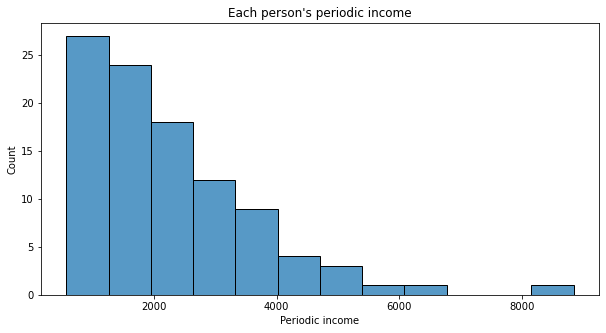

In [264]:
# most people's periodic income ranges from $1000 to $3000

plt.figure(figsize = (10, 5))
sns.histplot(customer_income.amount)
plt.title("Each person's periodic income")
plt.xlabel("Periodic income")

In [265]:
# check first customer's periodic income

data.loc[(data.customer_id == customer.customer_id[0]) & (data.txn_description == "PAY/SALARY"), ["date", "amount"]].groupby("date", as_index = False).sum()

,date,amount
0,2018-08-01,1013.67
1,2018-08-08,1013.67
2,2018-08-15,1013.67
3,2018-08-22,1013.67
4,2018-08-29,1013.67
5,2018-09-05,1013.67
6,2018-09-12,1013.67
7,2018-09-19,1013.67
8,2018-09-26,1013.67
9,2018-10-03,1013.67


In [266]:
## Loop through each person's salary

frequency = []
amount = []

for i in range(len(customer)):
    income = data.loc[(data.customer_id == customer.customer_id[i]) & (data.txn_description == "PAY/SALARY"), ["date", "amount"]].groupby("date", as_index = False).sum()
    count = len(income)
    if count == 0:
        frequency.append(np.nan)
        amount.append(np.nan)
    else:
        payment_freq = []
        for date in range(len(income)-1):
            payment_freq.append((income.date[date +1] - income.date[date]).days)
        frequency.append(max(payment_freq))
        amount.append(mode(income.amount))

        
customer_income['frequency'] = frequency
customer_income['income'] = amount

# assume there's no change for salary and 5 working days for each person.
customer_income['annual_salary'] = round(customer_income['income'] / customer_income['frequency'] * 260,2)

customer_income.head()

,customer_id,balance,age,amount,frequency,income,annual_salary
0,CUS-1005756958,4718.665385,53.0,970.47,7,1013.67,37650.60
1,CUS-1117979751,11957.202857,21.0,3578.65,7,1002.13,37221.97
2,CUS-1140341822,5841.720000,28.0,1916.51,7,892.09,33134.77
3,CUS-1147642491,8813.467692,34.0,1711.39,14,2320.30,43091.29
4,CUS-1196156254,23845.717143,34.0,3903.73,7,1068.04,39670.06


Text(0.5, 6.79999999999999, 'Annual salary')

<Figure size 720x360 with 0 Axes>

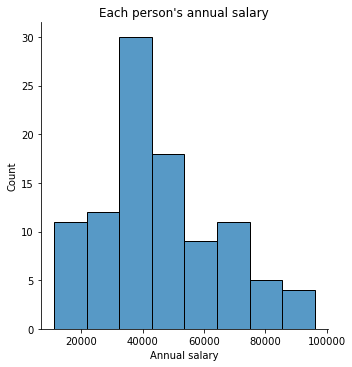

In [267]:
# Annual salary ranges from $15k to 100k

plt.figure(figsize = (10, 5))
sns.displot(customer_income.annual_salary)
plt.title("Each person's annual salary")
plt.xlabel("Annual salary")

In [268]:
# check null values

customer_income.isnull().sum()

customer_id      0
balance          0
age              0
amount           0
frequency        0
income           0
annual_salary    0
dtype: int64

In [269]:
customer_income.columns

Index(['customer_id', 'balance', 'age', 'amount', 'frequency', 'income',
       'annual_salary'],
      dtype='object')

In [270]:
customer_income.head()

,customer_id,balance,age,amount,frequency,income,annual_salary
0,CUS-1005756958,4718.665385,53.0,970.47,7,1013.67,37650.60
1,CUS-1117979751,11957.202857,21.0,3578.65,7,1002.13,37221.97
2,CUS-1140341822,5841.720000,28.0,1916.51,7,892.09,33134.77
3,CUS-1147642491,8813.467692,34.0,1711.39,14,2320.30,43091.29
4,CUS-1196156254,23845.717143,34.0,3903.73,7,1068.04,39670.06


In [271]:
unique = data.customer_id.unique()
len(unique)

100

In [272]:
# add gender to the dataframe before the modelling

gender = []
for i in unique:
    array = data.loc[data.customer_id == i, "gender"]
    gender.append(mode(array))
gender[:5]

['F', 'M', 'F', 'M', 'F']

In [273]:
# similar to gender, add state to the dataframe

state = []
for i in unique:
    array = data.loc[data.customer_id == i, "merchant_state"]
    state.append(mode(array))
state[:5]

['QLD', 'NSW', 'QLD', 'NSW', 'VIC']

In [274]:
variables = pd.DataFrame({'gener': gender,
                          'state': state})
variables

,gener,state
0,F,QLD
1,M,NSW
2,F,QLD
3,M,NSW
4,F,VIC
...,...,...
95,F,NaN
96,M,NaN
97,M,NaN
98,F,NSW


In [275]:
# concat the customer_income with the gender and state variables

new_variables = pd.concat([customer_income, variables], axis =1)
new_variables

,customer_id,balance,age,amount,frequency,income,annual_salary,gener,state
0,CUS-1005756958,4718.665385,53.0,970.47,7,1013.67,37650.60,F,QLD
1,CUS-1117979751,11957.202857,21.0,3578.65,7,1002.13,37221.97,M,NSW
2,CUS-1140341822,5841.720000,28.0,1916.51,7,892.09,33134.77,F,QLD
3,CUS-1147642491,8813.467692,34.0,1711.39,14,2320.30,43091.29,M,NSW
4,CUS-1196156254,23845.717143,34.0,3903.73,7,1068.04,39670.06,F,VIC
...,...,...,...,...,...,...,...,...,...
95,CUS-72755508,4558.675833,35.0,725.32,7,1946.57,72301.17,F,NaN
96,CUS-809013380,5579.186154,21.0,1037.07,14,3231.26,60009.11,M,NaN
97,CUS-860700529,4221.468333,30.0,1808.62,14,1757.81,32645.04,M,NaN
98,CUS-880898248,9722.380000,26.0,1433.98,7,1711.39,63565.91,F,NSW


In [276]:
new_variables.dtypes

customer_id       object
balance          float64
age              float64
amount           float64
frequency          int64
income           float64
annual_salary    float64
gener             object
state             object
dtype: object

In [277]:
new_variables.columns

Index(['customer_id', 'balance', 'age', 'amount', 'frequency', 'income',
       'annual_salary', 'gener', 'state'],
      dtype='object')

In [278]:
plot_variables = ['balance', 'age', 'amount', 'income']

Jointplot for Annual salary against balance 



/Users/anita/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


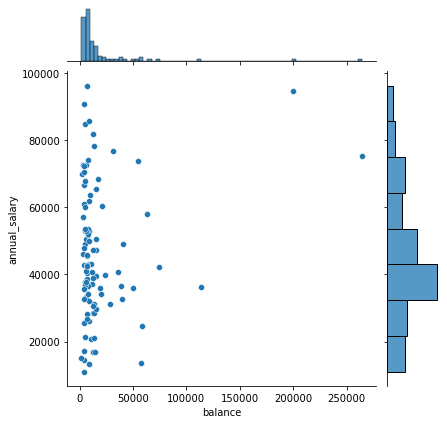

Correlation coefficient  0.1927280335527338
-----------------


Jointplot for Annual salary against age 



/Users/anita/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


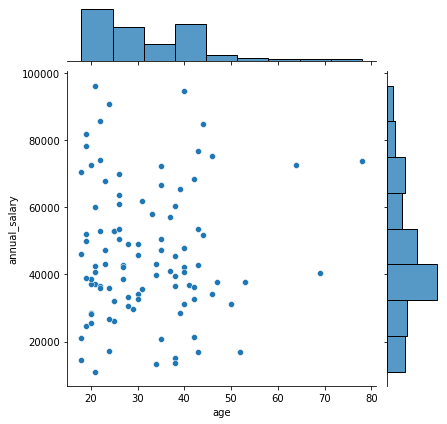

Correlation coefficient  0.03326691793921484
-----------------


Jointplot for Annual salary against amount 



/Users/anita/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


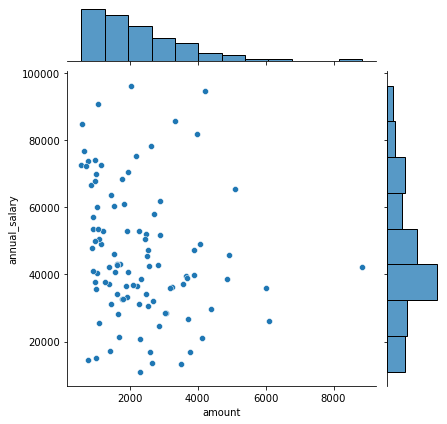

Correlation coefficient  -0.19041976076627043
-----------------


Jointplot for Annual salary against income 



/Users/anita/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


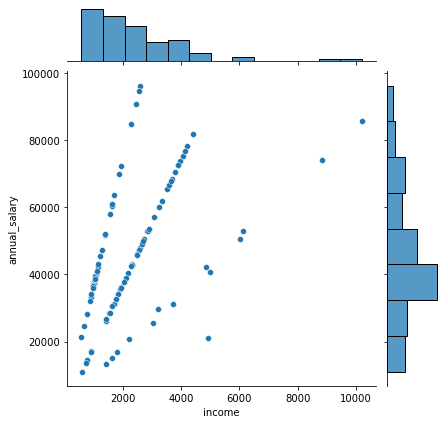

Correlation coefficient  0.5334600182756485
-----------------




In [279]:
for i in plot_variables:
    print('Jointplot for Annual salary against',format(i), "\n")
    sns.jointplot(new_variables[i], new_variables['annual_salary'])
    plt.show()
    print('Correlation coefficient ', np.corrcoef(new_variables[i],new_variables['annual_salary'])[0][1])
    print('-----------------\n\n')

### Import machine learning libraries

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [193]:
# target variable
y = new_variables.annual_salary
y.shape

(100,)

In [195]:
X = customer_income.drop(['customer_id', 'annual_salary'], axis = 1)
X.shape

(100, 5)

In [199]:
# split test and train data
Xs_train, Xs_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [200]:
# standardise the predictor matrix

ss = StandardScaler()

Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

### Linear Regression

<AxesSubplot:xlabel='annual_salary'>

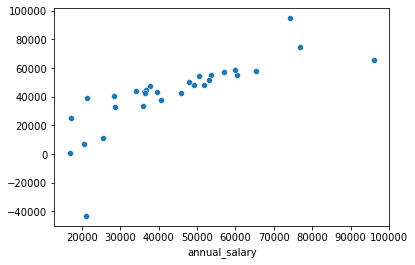

In [201]:
lr = LinearRegression()
lr.fit(Xs_train, y_train)
y_pred = lr.predict(Xs_test)
sns.scatterplot(x = y_test, y = y_pred)

In [202]:
# Scores
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_lr = metrics.r2_score(y_test, y_pred)
print (f'The R^2 is {r2_lr} and the RSME is {rmse_lr}')

The R^2 is 0.31660335146273866 and the RSME is 15437.580453510629


### Decision Tree

<AxesSubplot:xlabel='annual_salary'>

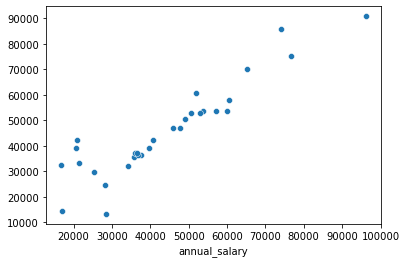

In [203]:
dt = DecisionTreeRegressor()
dt.fit(Xs_train, y_train)
y_pred_dt = dt.predict(Xs_test)
sns.scatterplot(x = y_test, y = y_pred_dt)

In [204]:
# Scores
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt))
r2_dt = metrics.r2_score(y_test, y_pred_dt)
print (f'The R^2 is {r2_dt} and the RSME is {rmse_dt}')

The R^2 is 0.8284438564142906 and the RSME is 7734.7440884231355


### Summary

The R square performs so much better with decision tree model, while the RMSE is halved compared to linear regression model, and both models still appear to be inaccuarate at this stage.

#### Forward approaches

- More data is required for a reliable model, because currently only 100 customers avaiable;
- More data engineering and feature selection is needed to differentiate the important features.